<h2>Anwendung von statistischen Verfahren basierend auf den Daten der Website transfermarkt.de</h2>


In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

<h3>Daten bereinigung nach Import der Daten aus dem Notebook "transfermarkt_clean"</h3>
          

In der folgenden Analyse werden statistische Verfahren auf die Daten des Fußballtransfermarktes angewandt. Hieraus sollte Rückschlüsse gezogen werden können, welchen Einfluss verschiedene Spielerdaten auf den Marktwert eines Spielers haben. Hierzu wurden die Daten der Website Transfermarkt.de für mithilfe eines Crawelrs gespeichert (crawler_transfermarkt.ipynb). Abgerufen wurden die Daten am 20.06.2020 weshalb die Aktualität abweichen kann.
Die Daten werden Ausßschlieslich für schulische Zwecke verwendet.


Der Marktwert eines Spielers ist zu vergleichen mit dem Marktwert eines Unternehmen. Bestimmt wird der Marktwert aus verschiedenen Analysen- , Studien- und Kennzahlen, die Experten hervorheben. So ist es z. B. von Bedeutung, ob ein Spieler viele Tore schießt, welche Titel dieser in seiner Karriere gewonnen hat und auch das Alter des Spielers. Nach dem Marktwert und dem dann noch bestehenden Vertrag, den ein Spieler besitzt, wird bei einem „Kauf“ eines Spielers so auch die Ablösesumme bestimmt, wenn diese nicht vorher vertraglich festgehalten wurde.



In [24]:
df = pd.read_excel ('./transfermarkt_clean.xlsx')
df.head(10)

,Unnamed: 0,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,0,Ederson,56000000,31,1993-08-17,Manchester City,Torwart,188.0,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,1,Claudio Bravo,1200000,1,1983-04-13,Manchester City,Torwart,184.0,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,2,John Stones,36000000,5,1994-05-28,Manchester City,Innenverteidiger,188.0,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom
3,3,Eric García,6300000,50,2001-01-09,Manchester City,Innenverteidiger,183.0,Barcelona,Premier League,20,2.177432,41.382894,España
4,4,Joel Latibeaudiere,100000,-,2000-01-06,Man City U23,Innenverteidiger,180.0,Doncaster,Premier League,21,-1.133531,53.522768,United Kingdom
5,5,Oleksandr Zinchenko,24000000,11,1996-12-15,Manchester City,Linker Verteidiger,175.0,"Radomyshl, Zhytomyr ...",Premier League,24,29.228959,50.496181,Україна
6,6,João Cancelo,36000000,27,1994-05-27,Manchester City,Rechter Verteidiger,182.0,Barreiro,Premier League,26,-9.047857,38.634066,Portugal
7,7,Fernandinho,8000000,25,1985-05-04,Manchester City,Defensives Mittelfeld,179.0,Londrina,Premier League,35,-51.159502,-23.311288,Brasil
8,8,Phil Foden,27000000,47,2000-05-28,Manchester City,Zentrales Mittelfeld,171.0,Stockport,Premier League,20,-2.160243,53.407901,United Kingdom
9,9,David Silva,12000000,21,1986-01-08,Manchester City,Offensives Mittelfeld,170.0,Arguineguín,Premier League,35,-15.681350,27.759075,España


Zunächst wird die Excel Datei, welche von dem Crawler erstellt wurde und von bereinigt wurde, in ein Dataframe geladen.

In [25]:
del df['Unnamed: 0']
df.head(3)

,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,Ederson,56000000,31,1993-08-17,Manchester City,Torwart,188.0,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,Claudio Bravo,1200000,1,1983-04-13,Manchester City,Torwart,184.0,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,John Stones,36000000,5,1994-05-28,Manchester City,Innenverteidiger,188.0,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom


Als nächstes muss wieder die Zeile "Unnamed" gelöscht werden, da diese durch ein Excel export / import automatisch erstellt wird.

In [26]:
df["Values"] = df.apply(lambda row: row["Values"] / 1000000, axis=1)
df = df.dropna()
df.head(3)

,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,Ederson,56.0,31,1993-08-17,Manchester City,Torwart,188.0,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,Claudio Bravo,1.2,1,1983-04-13,Manchester City,Torwart,184.0,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,John Stones,36.0,5,1994-05-28,Manchester City,Innenverteidiger,188.0,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom


Nun werden die Values aus optischen Gründen in Millionnen angegeben. Dafür wird jeder Marktwert geteilt.

<h3>einfache Statistische Verfahren</h3>

In [27]:
df.describe()

,Values,Size,Age,Lon,Lat
count,17816.000000,17816.000000,17816.000000,17816.000000,17816.000000
mean,3.556736,182.398181,26.561293,10.901433,40.996287
std,10.057739,6.677803,4.637430,29.348086,19.504675
min,0.025000,158.000000,16.000000,-123.113953,-39.025558
25%,0.200000,178.000000,23.000000,2.419125,40.925418
50%,0.400000,183.000000,26.000000,12.704068,46.192054
75%,1.800000,187.000000,30.000000,22.414036,51.458224
max,180.000000,204.000000,45.000000,176.167505,70.049628


Anhand dieser Tabelle kann man bereits erste statistische Werte ablesen.
So zeigte diese zum einen mit dem Wert 20914 bei count an wie viele Spielerdaten mithilfe des Crawlers erfasst wurden.
Die Differenz der count Kennzahl zwischen Values und Size kommt dadurch zustande, dass nicht alle Größen der Spieler bekannt sind und somit eine Differenz von 3098 entsteht.
Eine Auswirkung auf die statistischen Verfahren haben die fehlenden Daten jedoch nicht, da bei der Durschschnittsbetrachtung oberhalb, die fehleneden Datensätze (Spieler) nicht mit in die berrechnung Einfließen und somit das Ergebnis nicht verfälschen.
Bei folgenden Verfahren werden, wenn die fehlenden Daten die Statistik beinflussen können, diese nicht mit betrachtet.
Die Lon und Lat muss hierbei nicht beachtet werden, da diese ausschließlich zur Standort Bestimmung eines jeden Spielers dient.
Der Mittelwert der Daten lässt sich in der mean Spalte ablesen. Die Durchschnittsgröße der Spieler bei ca. 182,40, das Durchschnittsalter bei 25,98 Jahren und der Durchschnittliche Marktwert bei 3,064 Mio €. Zusätzlich kann man bereits die obere und untere Grenzen der Daten ablesen. So ist der kleinste Spieler 158,00 cm groß und der größte 204,00 cm. Bei den Marktwerten liegt die untere Grenze bei 0,025 Mio € und der höchste Marktwert liegt bei 180 Mio. €.

Text(0.5, 1.0, 'Marktwert im Verhältnis zum Alter der Spieler')

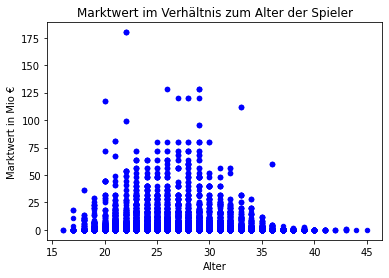

In [28]:
df.plot.scatter(x='Age',y='Values',c='Blue')
plt.ylabel("Marktwert in Mio €")
plt.xlabel("Alter")
plt.title("Marktwert im Verhältnis zum Alter der Spieler")

Das Punktediagramm zeigt nochmals die Verteilung der Jahre in der Fußballbranche sowie die Marktwerthöhen. Man kann hier auch bereits erste Erkenntnisse daraus ziehen, dass die höchsten Marktwerte der Spieler im Alter von 22 bis 30 erzielt werden. Des weiteren kann man sehen, dass der Spieler mit 175 Mio. € Marktwert einen großen Abstand zu den darunter liegenden hat.

<h3>Boxplots angewandt auf Daten von transfermarkt.de</h3>

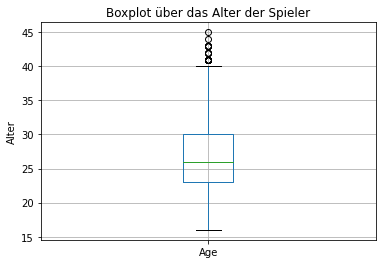

In [29]:
df.boxplot(column="Age")
plt.ylabel("Alter")
plt.title("Boxplot über das Alter der Spieler")
plt.show()

Der Boxplot symbolisiert nochmals die Werte, welche das df.describe bereits berechnet hat in grafischer Form, so sieht man das Alter der Fußballspieler auf einem Blick. So kann man anhand des Boxplots erkennen, 
dass das Durchschnittsalter der Fußballspieler bei 26 liegt. Der jüngste Fußballspieler ist 16 und der älteste 39. Ebenfalls lässt sich das obere und untere Quartil ablesen.

Die Quartile weißen dabei folgende Eigenschaften aus:
•	Unteres Quartil: Es sind maximal ein Viertel aller Werte unterhalb dieses Quartils und maximal drei Viertel über diesem Wert. In der Grafik oberhalb ist dies die untere Waagerechte Linie des Rechtecks.
•	Obers Quartil: Hier sind maximal drei Viertel aller Werte unterhalb dieses Wertes sowie maximal ein Viertel über ihn. In der Grafik oberhalb ist dies die obere Waagerechte Linie des Rechtecks.

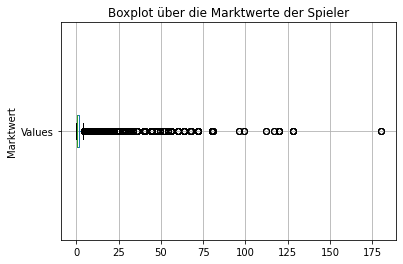

In [30]:
df.boxplot(column="Values", vert=False,)
plt.ylabel("Marktwert")
plt.title("Boxplot über die Marktwerte der Spieler")
plt.show()

Das Gleiche wird hier dann nochmal für den Marktwert der Spieler gemacht. 
Hier ist dies allerdings nicht sehr aussagekräftig, da die Werte sehr groß sind und stark streuen.

<h3>Top 10 wertvollste Spieler & Clubs Weltweit nach Marktwert</h3>

Text(0.5, 1.0, 'Die Top 10 Spieler Sortiert nach Marktwert')

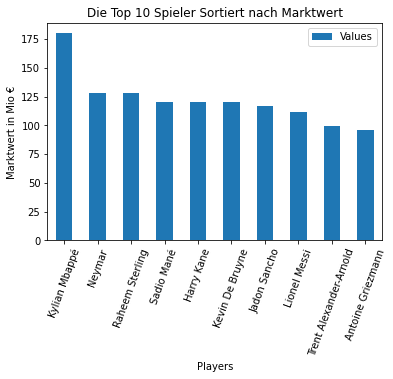

In [31]:
unique_players = df[['Players','Values']].drop_duplicates(subset="Players", keep="first")
first_ten_player = unique_players[['Players','Values']].sort_values(by=['Values'], ascending=False)[:10]
first_ten_player.plot(x='Players',y='Values' ,kind="bar", rot=70)
plt.ylabel("Marktwert in Mio €")
plt.title("Die Top 10 Spieler Sortiert nach Marktwert")

Die folgenden Balkendiagramme (Bar Graph) sollen die Top 10 an Klubs sowie Spieler von „analyse_transfermarkt.ipynb“ visualisieren. Das Balkendiagramm eignet sich gut, um die hier bestehenden Differenzen der einzelnen Elemente anzeigen zu lassen.
Man sieht hier bereits den großen Abstand, welcher Platz 1 und 2 trennt. Hier ist eine Differenz von knapp 50 Mio. € zuerkennen. Im Gegensatz dazu ist die Differenz zwischen den nachfolgenden Plätzen relativ gering. Was die Besonderheit des Spielers „Kylian Mbappe“ andeutet.

                   Values
Club                     
Paris SG         3386.800
Real Madrid      2665.500
FC Liverpool     2573.100
FC Barcelona     2530.950
Bayern München   2251.125
...                   ...
Boluspor U19        0.025
Olimp. Sarajevo     0.025
Leonidas            0.025
Atlantas            0.025
 FC Boca Gib        0.025

[983 rows x 1 columns]


Text(0.5, 1.0, 'Die Top 10 Clubs Sortiert nach Marktwert')

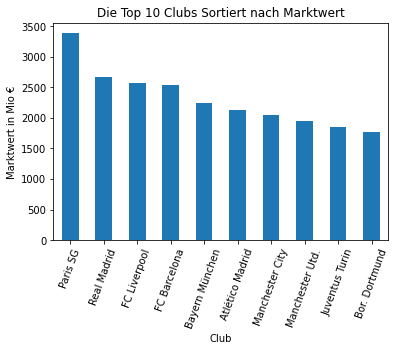

In [32]:
group_club = df[['Values','Club']]
group_club = group_club.groupby(['Club']).sum()
print(group_club.sort_values(by=['Values'], ascending=False))
first_ten_group_club = group_club.sort_values(by=['Values'], ascending=False)[:10]
first_ten_group_club['Values'].plot(kind="bar", rot=70)
plt.ylabel("Marktwert in Mio €")
plt.title("Die Top 10 Clubs Sortiert nach Marktwert")

Hier wird die Liste nach dem jeweiligen Verein gruppiert und sortiert. Dabei werden die Marktwerte zusammensummiert, um so eine Gesamtsumme der Marktwerte für den jeweiligen Klub zu erhalten. Nun wurde ein Balkendiagramm aus den ersten 10 Klubs gemacht. 
Auch die Sortierung nach Klubs gibt es ein Team, was hervorsticht, dies ist hier Paris SG. Eine weitere Auffälligkeit fällt auf, wenn man sich das Herkunftsland der Teams anguckt.

| Frankreich | Spanien         | England           | Deutschland    | Italien        |
|------------|-----------------|-------------------|----------------|----------------|
| Paris SG   | Real Madrid     | FC Liverpool      | Bayern München | Juventus Turin |
|            | FC Barcelona.   | Manchester City   | Bor. Dortmund  |                |
|            | Atletico Madrid | Manchester United |                |                |

Paris ist auf Platz 1. Der Marktwerte jedoch auch der einzige Vertreter der französischen Liga (Lique 1). Die Spanische, Englische und auch die Deutsche Liga haben mindestens 2 Vertreter in den Top 10. 
Zeigen tut dies, das in diesen Ligen mehrere Top Klubs vorhanden sind und somit ein größerer Konkurrenzkamp im Bezug zur Meisterschaft besteht.

<h3>Korrelationsanalyse zu den Daten Spieleralter, Marktwert und Spielergröße</h3>


               Marktwert  Spieler Alter  Spieler Größe
Marktwert       1.000000      -0.026413      -0.024825
Spieler Alter  -0.026413       1.000000       0.071756
Spieler Größe  -0.024825       0.071756       1.000000


Text(0.5, 1.0, 'Korrelation zwischen Alter, Marktwert und Größe')

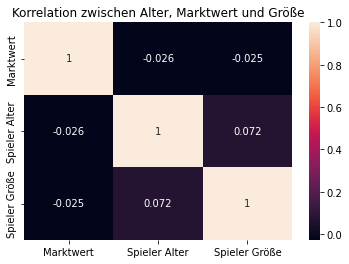

In [33]:
import seaborn as sn # Wird genutzt um folgende Heatmap zu erstellen.
dfcorr = df[['Values', 'Age' ,'Size']]
dfcorr = dfcorr.rename({'Values' : 'Marktwert', 'Age' : 'Spieler Alter' , 'Size' : 'Spieler Größe'}, axis=1)
corrMatrix = dfcorr.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.title("Korrelation zwischen Alter, Marktwert und Größe")

Eine Korrelation hilft dabei, Beziehungen zwischen gewissen Merkmalen zu analysieren. Dafür wird ein Korrelationskoeffizient berechnet, welcher einen Wert zwischen -1 und +1 annehmen kann und dabei eine Aussage über die Beziehung der Merkmale gibt.

Die Berechnung zum Thema Korelationsalanyse, lieferte zu allen Merkmalen ähnliche Ergebnisse.
Diese befinden sich alle zwischen 0,0 < 0,1. Dies sagt aus, dass zwischen Alter und Marktwert, Marktwert und Größe sowie Größe und Alter kein Zusammenhang herrscht. Je näher der Wert an +1 oder -1 liegt, desto größer ist der Zusammenhang.
Lediglich die Diagonalachse innerhalb der Matrix beinhalten den Wert 1. Hier ist der Zusammenhang natürlich gegeben, da eine Korrelation zwischen den gleichen Merkmalen und somit mit den gleichen Kennzahlen berechnet wird.
Zusammenhang bedeutet hierbei, dass z.B die Größe des Spielers, kein Einfluss auf den Marktwert hat. Man kann also pauschal nicht sagen, das ein kleinerer Spieler einen geringeren oder erhöten Marktwert besitzt.
Das Alter des Spielers hat laut der Korrelation ebenfalls kein Einfluss auf den Marktwert.
Die Korrelation zwischen Alter und Größe zeigt, das Spieler (Männer) im Alter von 16-45 nur geringfügig kleiner bzw. größer werden.

Durch die Abgrenzung mittels eines neuem Dataframes und der darauf angewendeten '.corr' Methode, werden die Datensätze mit fehlenden Spielergrößen hier nicht betrachtet.

Um das Ergebnis der Korrelation grafisch darstellen zu können, wurde die Libary seaborn genutzt.
Diese Libary erstellt 3x3 Feld und färbt diese nach der Stärke des Zusammenhanges ein.
Je heller die Kachel, desto größer ist der Zusammenhang zwischen den Kennzahlen

<h3>Marktwerte nach Nationalität</h3>

In [34]:
country_value = df[['country', 'Values']]
group_country = df[['country', 'Values']].groupby("country")
sum_group_country = group_country.sum().rename(columns={'Values':'Sum'})
country_value = country_value.merge(sum_group_country, left_on='country', right_index=True)
#country_value['Sum'] = group_country.transform('sum')
country_value = country_value.drop_duplicates(subset="country", keep="first")
country_value

,country,Values,Sum
0,Brasil,56.000,5798.150
1,Chile,1.200,96.600
2,United Kingdom,36.000,5761.475
3,España,6.300,5646.650
5,Україна,24.000,510.800
...,...,...,...
11088,Eritrea,0.150,0.150
12316,Comores;ﺍﻟﻘﻤﺮي;Komori,0.150,0.450
14936,San Marino,0.025,0.500
15679,Bahamas,0.100,0.100


Marktwert Summe für jedes Land bilden und diese dann als z in der Karte definieren.


In [35]:
import chart_studio.plotly as py # Dient zur Dartstellung der untengezeigten Karte.
import plotly.graph_objs as go # Dient zur Dartstellung der untengezeigten Karte.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Dient zur Dartstellung der untengezeigten offline Karte.
init_notebook_mode(connected=True)


data = dict(type = 'choropleth', 
           locations = country_value['country'],
           locationmode = 'country names',
           z = country_value['Values'],
           text = country_value['country'],
           colorbar = {'title':'Marktwert'})
layout = dict(title = 'Heatmap Marktwerte je Nationalität', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

Auf der darüber liegenden Karte sieht man die Gesamtsumme der Marktwerte pro Land. Hieraus lässt sich erkennen, aus welchen Staaten die Fußballer mit den höchsten Marktwerte stammen.

Mithilfe der Marktwert Karte soll eine Übersicht darüber gegeben werden, in welchem Verhältnis der Marktwert mit dem Herkunftsland der Spieler steht. So kann man anhand der Färbung des jeweiligen Landes erkennen, wie hoch die Summe der Marktwerte ist, aus die ein Spieler stammt. Die Karte deckt dabei alle 195 Staaten der Erde ab und ist dabei interaktiv steuerbar. So kann man sich innerhalb der Karte bewegen.

<h3>KMeans Verfahren

<h5>Bestimmung der Anzahl an Segmenten mit der Elbow-Methode

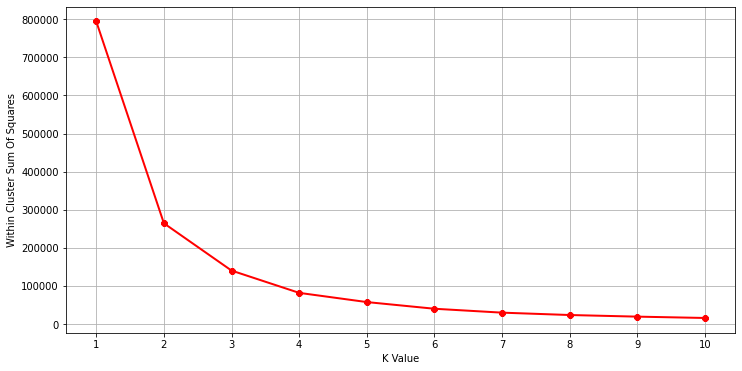

In [44]:
df_elbow = df[['Age','Size']].iloc[:,1:]

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_elbow)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Within Cluster Sum Of Squares")
plt.show()

Mithilfe der Elbow-Methode kann für diesen Datensatz berechnet werden, was die optimale Menge an Segmenten für den KMeans Algorithmus ist.
Die Segmente sind die Anzhal an Gruppierungs Punkte innerhalb des Kmeans Algorithmus. Die optimale Lösung lässt sich anhand des Graphen ablesen.
In diesem Fall liegt das beste Ergebnis zwischen 4 und 5, da hier  das größte delta(differenz) in der Steigung liegt.

In [45]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
df_kmean = df[['Age', 'Size']]
km = KMeans(n_clusters=4)
km.fit(df_kmean)
y_km = km.predict(df_kmean)

<h4>Anwendung des KMeans Algorithmus mit berechneter Anzahl an Clustern</h4>

Text(0.5, 0, 'Größe')

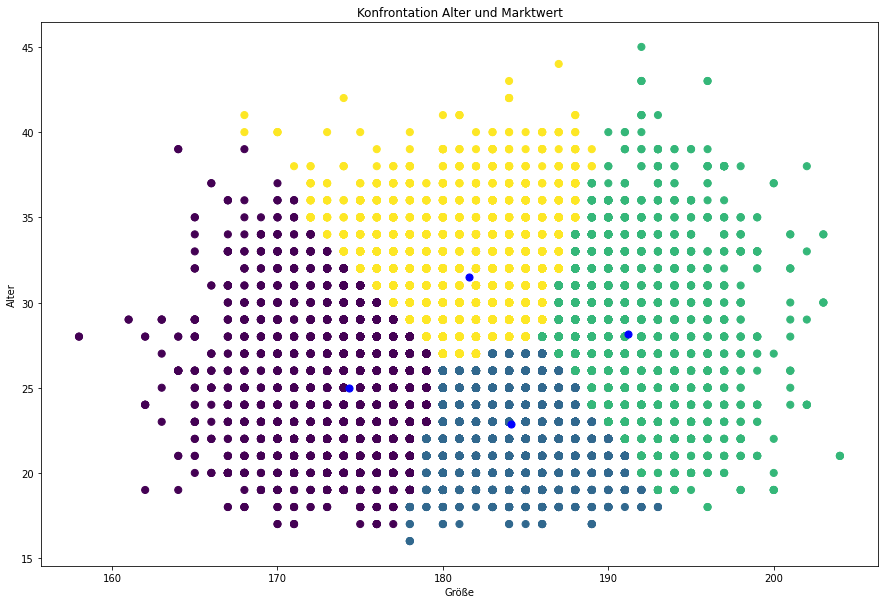

In [54]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(df_kmean["Size"], df_kmean['Age'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='blue', marker='.',s=200, alpha=1)
plt.title("Konfrontation Alter und Marktwert")
plt.ylabel('Alter')
plt.xlabel('Größe')

Der KMeans Algorithmus ist eine Clusteranalyse, mit der sich Gruppierungen bilden lassen.

Die Clusteranalyse konzentriert sich auf die Größe und das Alter der Profispieler. Das vorher angewandte Elbow-Verfahren errechnete das 4 Cluster, mit dem Verfahren angelegt werden sollten.
Die farbliche Aufteilung innerhalb der Grafik zeigt die verschieden errechneten Gruppierungen(violett, gelb, hellblau, grün).
Die blauen Punkte innerhalb der Gruppen sind die Ausgangspunkte, die der KMeans Algorithmus erstellt hat. Diese Punkte liegen dabei relativ nah aneinander,
wodurch kenntlich wird, dass die Differenzierung zwischen den verschiedenen Gruppen gering ist.


<h3>Untersuchung der Spielposition</h3>

In [39]:
group_value = df[['Position', 'Values']]
group_position = df[['Position', 'Values']].groupby("Position")
sum_group_position = group_position.agg(['sum', 'count', 'mean']).rename(columns={'Values':'Sum'})
group_value = group_value.merge(sum_group_position, left_on='Position', right_index=True)
group_value = group_value.drop_duplicates(subset="Position", keep="first")
del group_value['Values']
group_value.columns = ['Position', 'Sum_Value' , 'Count', 'Mean']
group_value.head(5)

e:\studium\data_science\pycharm_project\venv\lib\site-packages\pandas\core\frame.py:9190: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)



,Position,Sum_Value,Count,Mean
0,Torwart,3907.725,1963,1.990690
2,Innenverteidiger,10428.650,3067,3.400277
5,Linker Verteidiger,3795.400,1296,2.928549
6,Rechter Verteidiger,3981.650,1398,2.848104
7,Defensives Mittelfeld,4424.790,1439,3.074906


In [40]:
mittelfeld_value = group_value[group_value['Position'].str.contains('Mittelfeld')]
mittelfeld_value

,Position,Sum_Value,Count,Mean
7,Defensives Mittelfeld,4424.790,1439,3.074906
8,Zentrales Mittelfeld,9593.875,2098,4.572867
9,Offensives Mittelfeld,4357.575,1230,3.542744
37,Linkes Mittelfeld,717.425,299,2.399415
365,Rechtes Mittelfeld,615.875,275,2.239545
7320,Mittelfeld,0.450,2,0.225000


Text(0.5, 1.0, 'Kreisdiagramm zur Häufigkeit der verschiedenen Mittelfeld Rollen')

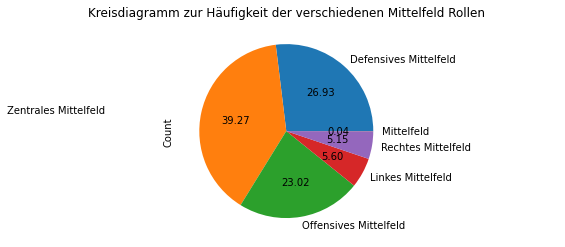

In [41]:
mittelfeld_value['Count'].plot(kind='pie', labels=mittelfeld_value.Position, fontsize=10,autopct='%.2f')
plt.title("Kreisdiagramm zur Häufigkeit der verschiedenen Mittelfeld Rollen")

Da im Fußball die Position der Spieler sehr unterschiedlich sind und oftmals auch unterschiedlich bewertet werden, wurde hier zunächst ein Kreisdiagramm erstellt, um alle Positionen, welche im Mittelfeld existieren, anzuzeigen und diese gleichzeitig mit der dazugehörigen Häufigkeit visualisierbar zu machen. 
Anhand des Kreisdiagramms kann man erkennen, dass das Zentralemittelfeld mit 39 % die meist gespielte Position
im Mittelfeld ist.

<h3>Analyse der Marktwerte nach Rückennummer</h3>

In [52]:
number_agg = df[['Number', 'Values']]
number_agg.drop(df.loc[df['Number']=='-'].index, inplace=True)
group_number = df[['Number', 'Values']].groupby("Number")
count_group_number = group_number.agg(['sum', 'count', 'mean']).rename(columns={'Values':'Sum'})
number_agg = number_agg.merge(count_group_number, left_on='Number', right_index=True)
number_agg.columns = ['Number','Values', 'Sum_Value' , 'Count' , 'Mean']
number_agg = number_agg.drop_duplicates(subset="Number", keep="first")
number_agg


e:\studium\data_science\pycharm_project\venv\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

e:\studium\data_science\pycharm_project\venv\lib\site-packages\pandas\core\frame.py:9190: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)



,Number,Values,Sum_Value,Count,Mean
0,31,56.00,723.500,229,3.159389
1,1,1.20,1934.675,581,3.329905
2,5,36.00,2740.125,614,4.462744
3,50,6.30,42.150,27,1.561111
5,11,24.00,2376.625,580,4.097629
...,...,...,...,...,...
2150,75,0.35,3.250,10,0.325000
2239,82,0.30,9.650,21,0.459524
3264,61,0.05,81.000,15,5.400000
5669,58,0.45,1.050,8,0.131250


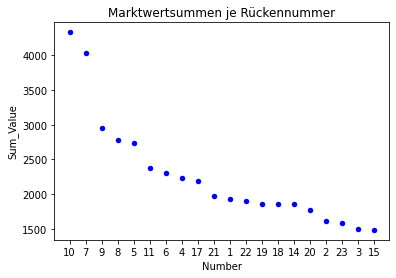

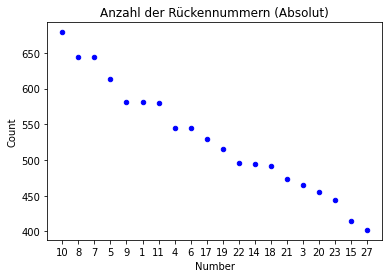

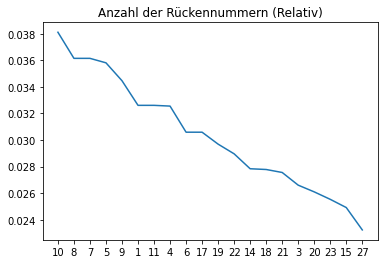

In [53]:
number_value = number_agg.sort_values(by=['Sum_Value'], ascending=False)[:20]
number_value.plot.scatter(x='Number',y='Sum_Value',c='Blue')
plt.title("Marktwertsummen je Rückennummer")
plt.show()

number_count = number_agg.sort_values(by=['Count'], ascending=False)[:20]
number_count.plot.scatter(x='Number',y='Count',c='Blue')
plt.title("Anzahl der Rückennummern (Absolut)")
plt.show()

x = number_count['Number'][:20]
y = df.Number.value_counts(normalize=True,dropna=False)[:20]
plt.title("Anzahl der Rückennummern (Relativ)")
plt.plot(x, y)
plt.show()

In der Fußball Welt sind die Rückennummer auf dem Trikot des Spielers nicht nur eine Nummer, sondern sind eine Art Statussymbol, welche Rolle man in einem Verein spielt.
Dabei stehen die Nummern für die Stammposition, die ein Spieler spielt. So steht die Rückennummern 1 z. B. für den Stammtorhüter einer Mannschaft oder die Nummer 9 für den Stamm Stürmer einer Mannschaft.
Mithilfe den folgenden Grafiken soll demnach geprüft werden, welche Marktwertsummen die Spieler mit der jeweiligen Rückennummer haben und wie oft die Rückennummer vergeben ist.
Bei manchen Spielern in dem Datensatz ist die Rückennummer nicht bekannt. Aus diesem Grund werden diese mit dem Wert"-" vor der Betrachtung entfernt.
In dem Koordinatenssystem oberhalb, kann man erkennen, dass die Nummer 10 und 7 die meist genutzten Rückennummern sind